In [1]:
pip install spacy

     ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
     ---------------------------------------- 0.1/12.2 MB 2.3 MB/s eta 0:00:06
      --------------------------------------- 0.2/12.2 MB 2.0 MB/s eta 0:00:07
      --------------------------------------- 0.3/12.2 MB 2.3 MB/s eta 0:00:06
     - -------------------------------------- 0.4/12.2 MB 2.2 MB/s eta 0:00:06
     - -------------------------------------- 0.6/12.2 MB 2.6 MB/s eta 0:00:05
     -- ------------------------------------- 0.7/12.2 MB 2.6 MB/s eta 0:00:05
     -- ------------------------------------- 0.9/12.2 MB 2.8 MB/s eta 0:00:05
     --- ------------------------------------ 1.1/12.2 MB 3.1 MB/s eta 0:00:04
     ---- ----------------------------------- 1.3/12.2 MB 3.3 MB/s eta 0:00:04
     ----- ---------------------------------- 1.7/12.2 MB 3.5 MB/s eta 0:00:03
     ------ --------------------------------- 2.0/12.2 MB 3.7 MB/s eta 0:00:03
     ------- -------------------------------- 2.3/12.2 MB 4

# PACKAGES

NLTK PACKAGE:
    NLTK (Natural Language Toolkit) is a popular Python library for working with human language data. It provides a wide range of tools and resources for tasks such as tokenization, stemming, tagging, parsing, semantic reasoning, and more. NLTK is widely used in the fields of natural language processing (NLP) and computational linguistics.

SPACY PACKAGE:
    Spacy is another popular Python library used for natural language processing (NLP) tasks. It is designed to be efficient, fast, and production-ready, making it suitable for both research and industrial applications. Spacy focuses on providing high-performance implementations of common NLP algorithms and models.

KERAS:
    Keras is a popular open-source deep learning framework written in Python. It provides a high-level, user-friendly interface for building and training neural networks. Keras is known for its simplicity and ease of use, making it a preferred choice for both beginners and experienced researchers.

TENSORFLOW:TensorFlow is an open-source machine learning framework developed by Google. It provides a comprehensive set of tools, libraries, and resources for building and deploying machine learning models. TensorFlow is widely used for various tasks, including deep learning, neural networks, natural language processing, computer vision, and more.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation
import nltk
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from spacy import displacy
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
import keras
import tensorflow as tf
from sklearn.pipeline import Pipeline


In [4]:
data=pd.read_csv("C:/Users/HP/Downloads/Language Detection.csv")
data.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [5]:
data.shape

(10337, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [7]:
data.describe(include='O').transpose()

,count,unique,top,freq
Text,10337,10267,Jag är ledsen.,3
Language,10337,17,English,1385


In [8]:
data.isna().sum()

Text        0
Language    0
dtype: int64

In [9]:
data['Language'].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

# Check for different target labels:


Text(0.5, 1.0, 'Target Labels')

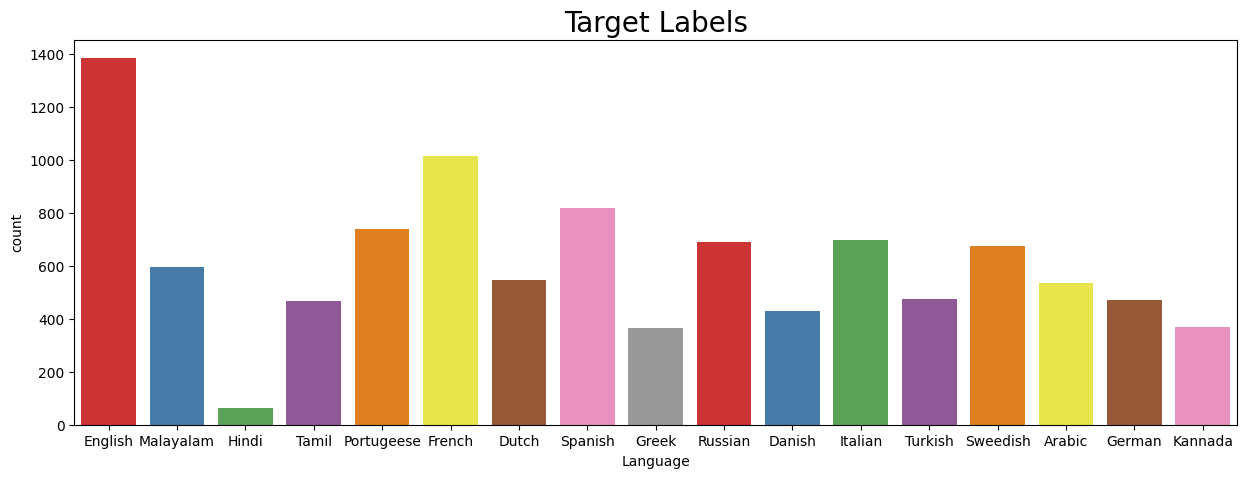

In [10]:
plt.figure(figsize=(15,5))
sns.countplot(x='Language',data=data,palette='Set1')
plt.title('Target Labels',fontsize=20)

<function matplotlib.pyplot.show(close=None, block=None)>

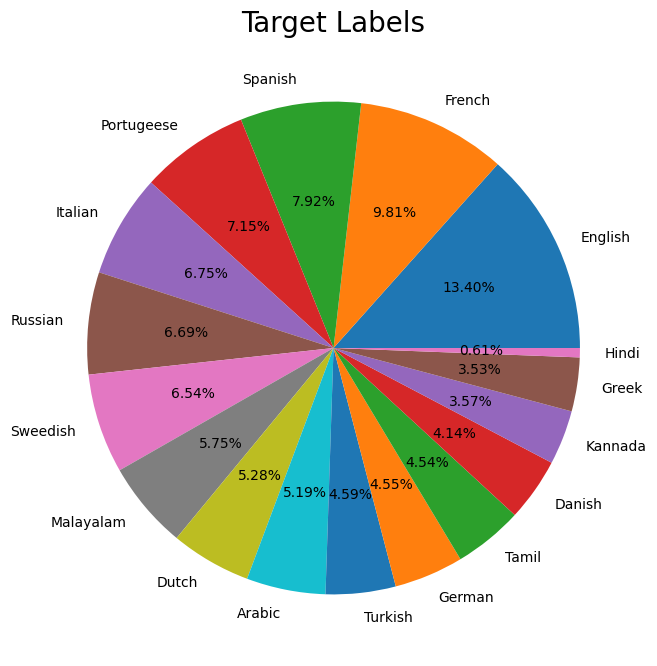

In [11]:
plt.figure(figsize=(8,8))
plt.pie(x = data['Language'].value_counts() ,autopct='%1.2f%%' ,labels=data['Language'].value_counts().index)
plt.title('Target Labels',fontsize=20)
plt.show

# Show Input X and Output y

In [12]:
X=data.iloc[:,0]
y=data.iloc[:,-1]

In [13]:
X

0         Nature, in the broadest sense, is the natural...
1        "Nature" can refer to the phenomena of the phy...
2        The study of nature is a large, if not the onl...
3        Although humans are part of nature, human acti...
4        [1] The word nature is borrowed from the Old F...
                               ...                        
10332    ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333    ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334    ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...
10335    ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...
10336    ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...
Name: Text, Length: 10337, dtype: object

In [14]:
y

0        English
1        English
2        English
3        English
4        English
          ...   
10332    Kannada
10333    Kannada
10334    Kannada
10335    Kannada
10336    Kannada
Name: Language, Length: 10337, dtype: object

# Text Cleaning & Visualization

   1.TOKENIZATION:
    NLTK provides various tokenization methods to split text into individual words or sentences. It supports word tokenization, sentence tokenization, and other specialized tokenizers.
   

 2.REMOVE STOP WORDS:
    Removing stop words from text is a common preprocessing step in NLP to reduce noise and improve the efficiency of subsequent analyses or models.

3.Part-of-speech (POS) tagging: 
    Spacy includes pre-trained models for assigning part-of-speech tags to words in a sentence. These models have been trained on large annotated datasets and provide accurate and reliable POS tagging.

 4.Snowballstemmer:
    The Snowball Stemmer is a stemming algorithm implemented in various programming languages, including Python. It is based on the Porter stemming algorithm and provides stemming functionality for different languages.
In Python, the Snowball Stemmer is available as part of the NLTK (Natural Language Toolkit) library. It supports stemming for various languages, including English, Spanish, French, German, Italian, Portuguese, Dutch, Swedish, and more.

5.Named Entity Recognition (NER): 
    Spacy offers built-in models for named entity recognition, which can identify and classify entities such as names of people, organizations, locations, dates, and more.

"en_core_web_sm" refers to a specific pre-trained English language model provided by the spaCy library. It is one of the available models for English language processing and analysis.

The "en_core_web_sm" model is a small-sized model that includes vocabulary, syntax, named entity recognition (NER), and word vectors. It is trained on a mixture of sources, including web text, news, and other diverse English texts.

6.Visualization:The dependency visualizer, dep, shows part-of-speech tags and syntactic dependencies.

In [16]:
def word_token(sentence,flage=0):
    token=word_tokenize(sentence)
    if flage==1:
        return token
    return '  ||  '.join(token)
def remove_stop_word(sentence):
    stop_words = stopwords.words('english')
    punct = list(punctuation)
    token=word_token(sentence,1)
    words=[]
    for word in token:
        if  word not in punct and not word.isdigit() :
            words.append(word.lower())
    return words  
def pos(sentence):
    nlp = spacy.load('en_core_web_sm')
    for w , m in nltk.pos_tag(word_token(sentence,1)):
           print(f'word : ({w}), type : ({m}) , means : ({spacy.explain(m)})')
def Stemming(sentence): 
    snowball = SnowballStemmer(language='english')
    for word in word_token(sentence,1):
        print(word,"--->",snowball.stem(word))
'''def Lemmatizer(sentence):
    lemmatizer = WordNetLemmatizer()
    for word in word_token(sentence,1):
        print(word,"--->",lemmatizer.lemmatize(word))
    '''    
def NER_word(sentence):
    nlp = spacy.load('en_core_web_sm')
    doc=nlp(sentence)
    if doc.ents:
        for token in doc.ents:
            print(token.text , ' : ' ,  token.label_ , ' : ' , str(spacy.explain(token.label_)))
    else:
        print('No named entities found.') 
def Visualization(sentence): 
    nlp = spacy.load('en_core_web_sm')
    doc=nlp(sentence)
    displacy.render(doc, style='dep', jupyter=True, options={'distance': 80})
    displacy.render(doc, style='ent', jupyter=True)

In [17]:
for i in np.random.randint(0,10337,10):
    print(word_token(X[i]))
    print('*'*40)

rubin  ||  marmelade  ||  på  ||  det  ||  og  ||  tog  ||  en  ||  kæmpe  ||  bid  ||  ,  ||  det  ||  er  ||  så  ||  varmt  ||  ,  ||  jeg  ||  kan  ||  ikke  ||  spise  ||  det  ||  godt  ||  ,  ||  det  ||  er  ||  brød  ||  lavet  ||  af  ||  guld  ||  og  ||  det  ||  fineste  ||  også  ||  ,  ||  men  ||  hvis  ||  du  ||  ikke  ||  kan  ||  spise  ||  det  ||  ,  ||  skal  ||  jeg  ||  skaffe  ||  dig  ||  sølvbrød  ||  sølv  ||  he  ||  ,  ||  hvorfor  ||  ikke  ||  du  ||  spiser  ||  .
****************************************
[  ||  36  ||  ]  ||  ​  ||  Ese  ||  año  ||  ,  ||  Wikipedia  ||  abarcaba  ||  26  ||  idiomas  ||  ,  ||  46  ||  en  ||  2003  ||  y  ||  161  ||  a  ||  finales  ||  de  ||  2004  ||  .
****************************************
благодарю  ||  вас  ||  за  ||  ваше  ||  усилие  ||  .
****************************************
Según  ||  Jimmy  ||  Wales  ||  ,  ||  uno  ||  de  ||  los  ||  fundadores  ||  de  ||  Wikipedia  ||  ,  ||  la  ||  colab

In [19]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [37]:
 nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
for i in np.random.randint(0,10337,10):
    print('before')
    print(word_token(X[i]))
    print('after')
    print(remove_stop_word(X[i]))
    print('*'*40)

before
Tengo  ||  que  ||  irme  ||  .
after
['tengo', 'que', 'irme']
****************************************
before
நீங்கள்  ||  யாரையாவது  ||  எஸ்.எம்.எஸ்  ||  செய்ய  ||  விரும்பினால்  ||  அல்லது  ||  உரைக்கு  ||  உரை  ||  என்று  ||  ஒரு  ||  செய்தியை  ||  அவர்களுக்கு  ||  அனுப்ப  ||  விரும்பினால்  ||  அமெரிக்காவில்  ||  சந்தேகம்  ||  இருக்க  ||  இடமில்லை  ||  ,  ||  எனவே  ||  நான்  ||  உங்களுக்கு  ||  உரை  ||  அனுப்புவேன்  ||  என்றால்  ||  நான்  ||  உங்களுக்கு  ||  ஒரு  ||  செய்தியை  ||  வாட்ஸ்அப்  ||  அல்லது  ||  ஒரு  ||  தந்தி  ||  அல்லது  ||  தூதர்  ||  மூலம்  ||  அனுப்புவேன்  ||  வருத்தப்பட  ||  வேண்டாம்  ||  என்று  ||  யாரையாவது  ||  உற்சாகப்படுத்த  ||  மீண்டும்  ||  உங்களுக்கு  ||  உரை  ||  அனுப்புங்கள்  ||  ,  ||  நீங்கள்  ||  ஏன்  ||  அழுகிறீர்கள்  ||  என்பது  ||  போல  ||  அது  ||  மதிப்புக்குரியது  ||  அல்ல  ||  என்று  ||  சொல்லலாம்  ||  .
after
['நீங்கள்', 'யாரையாவது', 'எஸ்.எம்.எஸ்', 'செய்ய', 'விரும்பினால்', 'அல்லது', 'உரைக்கு', 'உரை', 'என்று', 'ஒரு', 'செய்தியை', 'அவர்களு

In [21]:
X_clean=[]
for sentence in X:
    X_clean.append(' '.join(remove_stop_word(sentence)))
pd.DataFrame(np.array(X_clean),columns=['Text'])

,Text
0,nature in the broadest sense is the natural ph...
1,`` nature '' can refer to the phenomena of the...
2,the study of nature is a large if not the only...
3,although humans are part of nature human activ...
4,the word nature is borrowed from the old frenc...
...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334,ಹೇಗೆ ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎಲ್...
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...


In [25]:
pip install -U spacy

Note: you may need to restart the kernel to use updated packages.


In [23]:
%pip install -U pip setuptools wheel
%pip install -U spacy

     ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
     ---------- ----------------------------- 0.3/1.1 MB 8.9 MB/s eta 0:00:01
     ----------------------------- ---------- 0.8/1.1 MB 8.7 MB/s eta 0:00:01
     ---------------------------------------- 1.1/1.1 MB 11.7 MB/s eta 0:00:00
  Using cached wheel-0.40.0-py3-none-any.whl (64 kB)
  Attempting uninstall: wheel
    Found existing installation: wheel 0.37.1
    Uninstalling wheel-0.37.1:
      Successfully uninstalled wheel-0.37.1
  Attempting uninstall: setuptools
    Found existing installation: setuptools 65.6.3
    Uninstalling setuptools-65.6.3:
      Successfully uninstalled setuptools-65.6.3
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.27 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.27 requires nbformat==5.4.0, but you have nbformat 5.7.0 which is incompatible.


Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "install -U spacy" - maybe you meant "install"



In [26]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.1/12.8 MB 1.6 MB/s eta 0:00:08
      --------------------------------------- 0.2/12.8 MB 1.9 MB/s eta 0:00:07
     - -------------------------------------- 0.5/12.8 MB 2.6 MB/s eta 0:00:05
     -- ------------------------------------- 0.9/12.8 MB 4.2 MB/s eta 0:00:03
     --- ------------------------------------ 1.2/12.8 MB 4.4 MB/s eta 0:00:03
     ------- -------------------------------- 2.4/12.8 MB 7.3 MB/s eta 0:00:02
     ---------- ----------------------------- 3.3/12.8 MB 8.4 MB/s eta 0:00:02
     ------------- -------------------------- 4.2/12.8 MB 9.9 MB/s eta 0:00:01
     ------------- -------------------------- 4.3/12.8 MB 9.8 MB/s eta 0:00:01
     ------------- -------------------------- 4.3/12.8 MB 9.8 MB/s eta 0:00:01
     -------------- ------------------------- 4.6/12.8 MB 8.1 MB/s

In [30]:
for i in np.random.randint(0,10337,5):
    pos(X_clean[i])
    print('*'*40)

word : (três), type : (NN) , means : (noun, singular or mass)
word : (se), type : (NN) , means : (noun, singular or mass)
word : (você), type : (FW) , means : (foreign word)
word : (quiser), type : (JJR) , means : (adjective, comparative)
word : (perguntar), type : (NN) , means : (noun, singular or mass)
word : (o), type : (NN) , means : (noun, singular or mass)
word : (que), type : (NN) , means : (noun, singular or mass)
word : (você), type : (NN) , means : (noun, singular or mass)
word : (tem), type : (NN) , means : (noun, singular or mass)
word : (feito), type : (NN) , means : (noun, singular or mass)
****************************************
word : (വാൻഡലിസം), type : (JJ) , means : (adjective (English), other noun-modifier (Chinese))
word : (കാണിക്കുന്ന), type : (NNP) , means : (noun, proper singular)
word : (ഉപയോക്താവിന്), type : (NNP) , means : (noun, proper singular)
word : (അങ്ങനെ), type : (NNP) , means : (noun, proper singular)
word : (ചെയ്യരുത്), type : (NNP) , means : (noun, 

In [28]:
 nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [31]:
for i in np.random.randint(0,10337,5):
    Stemming(X_clean[i])
    print('*'*40)

சாங்கர் ---> சாங்கர்
அவர்கள் ---> அவர்கள்
விக்கிப்பீடியா ---> விக்கிப்பீடியா
என்ற ---> என்ற
சொல்லை ---> சொல்லை
விக்கி ---> விக்கி
ஒருவகை ---> ஒருவகை
கூட்டாக்க ---> கூட்டாக்க
இணையத்தளம் ---> இணையத்தளம்
****************************************
say ---> say
to ---> to
them ---> them
maybe ---> mayb
i ---> i
'm ---> 'm
being ---> be
obtuse ---> obtus
but ---> but
i ---> i
do ---> do
n't ---> n't
know ---> know
why ---> whi
you ---> you
're ---> re
so ---> so
upset ---> upset
smart ---> smart
word ---> word
number ---> number
is ---> is
sluggish ---> sluggish
sluggish ---> sluggish
sluggish ---> sluggish
means ---> mean
to ---> to
move ---> move
in ---> in
slow ---> slow
manner ---> manner
to ---> to
be ---> be
kind ---> kind
of ---> of
slower ---> slower
paced ---> pace
****************************************
vous ---> vous
pouvez ---> pouvez
aider ---> aider
au ---> au
développement ---> développ
de ---> de
wikipédia ---> wikipédia
en ---> en
continuant ---> continu
la ---> la
traduction

In [32]:
for i in np.random.randint(0,10337,10):
    NER_word(X_clean[i])
    print('*'*40)

No named entities found.
****************************************
No named entities found.
****************************************
ik ben bang  :  PERSON  :  People, including fictional
niet  :  NORP  :  Nationalities or religious or political groups
eens ben  :  PERSON  :  People, including fictional
****************************************
No named entities found.
****************************************
de la croyance de beaucoup de philosophes des xviie  :  PERSON  :  People, including fictional
xviiie  :  NORP  :  Nationalities or religious or political groups
loi universelle  :  PERSON  :  People, including fictional
****************************************
No named entities found.
****************************************
ich werde  :  PERSON  :  People, including fictional
****************************************
No named entities found.
****************************************
No named entities found.
****************************************
28,4  :  CARDINAL  :  Numerals that

In [33]:
for i in np.random.randint(0,10337,10):
    Visualization(X_clean[i])
    print('*'*100)

C:\Users\HP\anaconda3\lib\site-packages\spacy\displacy\__init__.py:215: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


# TFIDVECTORIZER

TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical representation technique commonly used in natural language processing (NLP) to convert text documents into a vectorized form that can be used for various machine learning tasks, such as text classification, information retrieval, and clustering. The TF-IDF vectorizer is a popular implementation of this technique.

# PIPELINE

In the context of machine learning, a pipeline refers to a sequence of data processing steps that are applied in a specific order to transform raw input data into a desired output or prediction. Pipelines are commonly used to automate and streamline the process of building and deploying machine learning models.

In Python, the scikit-learn library provides a convenient way to define and execute pipelines using the Pipeline class. The Pipeline class allows you to chain together multiple data processing steps, such as data preprocessing, feature extraction, and model training, into a single object.

In [39]:
tfid=TfidfVectorizer()
PipelineModel = Pipeline([('tfid',tfid)])
X_input=PipelineModel.fit_transform(X_clean)
X_input = pd.DataFrame.sparse.from_spmatrix(X_input)
X_input

,0,1,2,3,4,5,6,7,8,9,...,39561,39562,39563,39564,39565,39566,39567,39568,39569,39570
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
for feature in tfid.get_feature_names_out():
    print(feature,end=' & ')

00 & 000 & 000க & 001 & 001097666virtual & 004 & 020 & 03 & 08 & 10 & 100 & 10000 & 1013 & 11 & 1114 & 113 & 115 & 12 & 1203 & 122 & 13 & 137 & 13th & 14 & 1408 & 141 & 15 & 150 & 15e & 15ന & 16ന & 17 & 18 & 1800s & 19 & 190 & 1959ൽ & 1960s & 1970s & 1980s & 1988 & 1990s & 1999 & 1er & 20 & 200 & 2000 & 2001 & 2002 & 2003 & 2004 & 2005 & 2006 & 2007 & 2008 & 2009 & 2010 & 2010s & 2011 & 2012 & 2013 & 2014 & 2015 & 2016 & 2017 & 2019 & 2020 & 2021 & 21 & 21st & 22 & 23 & 235 & 237 & 238 & 240 & 25 & 26 & 264 & 268 & 27 & 274301 & 28 & 281 & 30 & 300 & 31 & 321 & 33 & 330 & 34 & 345 & 35 & 352 & 36 & 37 & 38 & 39 & 395 & 399 & 399677 & 3d & 3g & 3k & 40 & 41 & 42 & 43 & 4499779 & 45 & 456 & 46 & 465 & 47 & 473 & 488 & 49 & 4de & 4e & 50 & 500 & 51 & 512 & 52 & 530 & 54 & 540 & 55 & 555 & 56 & 58 & 588 & 59 & 597 & 5e & 60 & 605 & 61 & 618 & 63 & 639 & 672 & 68 & 6bibliotheek & 700 & 7000 & 708 & 71 & 710 & 721 & 723 & 727 & 73 & 74 & 747 & 75 & 76 & 77 & 78 & 78697 & 80 & 800 & 820 & 838

In [42]:
pd.DataFrame(tfid.get_feature_names_out(),columns=['Feature Names'])

,Feature Names
0,00
1,000
2,000க
3,001
4,001097666virtual
...,...
39566,ൽപ
39567,ൽവർ
39568,ൾക
39569,ൾപ


In [43]:
dic={}
i=0
for word in pd.unique(y):
    dic[word]=i
    i+=1
def get_code(N):
    for x,y in dic.items():
        if y==N:
            return x
dic    

{'English': 0,
 'Malayalam': 1,
 'Hindi': 2,
 'Tamil': 3,
 'Portugeese': 4,
 'French': 5,
 'Dutch': 6,
 'Spanish': 7,
 'Greek': 8,
 'Russian': 9,
 'Danish': 10,
 'Italian': 11,
 'Turkish': 12,
 'Sweedish': 13,
 'Arabic': 14,
 'German': 15,
 'Kannada': 16}

In [44]:
label=[]
for word in y:
    label.append(dic[word])
label=pd.DataFrame(label,columns=['langauge'])    
label

,langauge
0,0
1,0
2,0
3,0
4,0
...,...
10332,16
10333,16
10334,16
10335,16


# Data Split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_input, label, test_size=0.1, random_state=33)
print('X train shape is :',X_train.shape)
print('X test shape is :',X_test.shape)
print('y test shape is :',y_train.shape)
print('y test shape is :',y_test.shape)

X train shape is : (9303, 39571)
X test shape is : (1034, 39571)
y test shape is : (9303, 1)
y test shape is : (1034, 1)


# Keras Model

In Keras, a sequential model is a linear stack of layers, where each layer has exactly one input tensor and one output tensor. It is the simplest and most common type of model used in deep learning. The sequential model allows you to build neural networks by stacking layers in a sequential manner.

In [46]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(17, activation=tf.nn.softmax)
                                   ])

In [47]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist=model.fit(X_train, y_train, epochs=5)

Epoch 1/5
291/291 [==============================] - 64s 209ms/step - loss: 0.6007 - accuracy: 0.8428
Epoch 2/5
291/291 [==============================] - 56s 194ms/step - loss: 0.0227 - accuracy: 0.9956
Epoch 3/5
291/291 [==============================] - 54s 184ms/step - loss: 0.0124 - accuracy: 0.9966
Epoch 4/5
291/291 [==============================] - 53s 181ms/step - loss: 0.0116 - accuracy: 0.9968
Epoch 5/5
291/291 [==============================] - 57s 194ms/step - loss: 0.0107 - accuracy: 0.9968


In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 39571)             0         
                                                                 
 dense (Dense)               (None, 512)               20260864  
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 17)                2193      
                                                                 
Total params: 20,427,281
Trainable params: 20,427,281
Non-trainable params: 0
_________________________________________________________________


In [49]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=120)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [50]:
model.evaluate(X_test,y_test)

33/33 [==============================] - 1s 18ms/step - loss: 0.1067 - accuracy: 0.9710


[0.1066846027970314, 0.9709864854812622]

In [51]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy
0,0.600663,0.842846
1,0.022737,0.995593
2,0.012443,0.996560
3,0.011583,0.996775
4,0.010657,0.996775


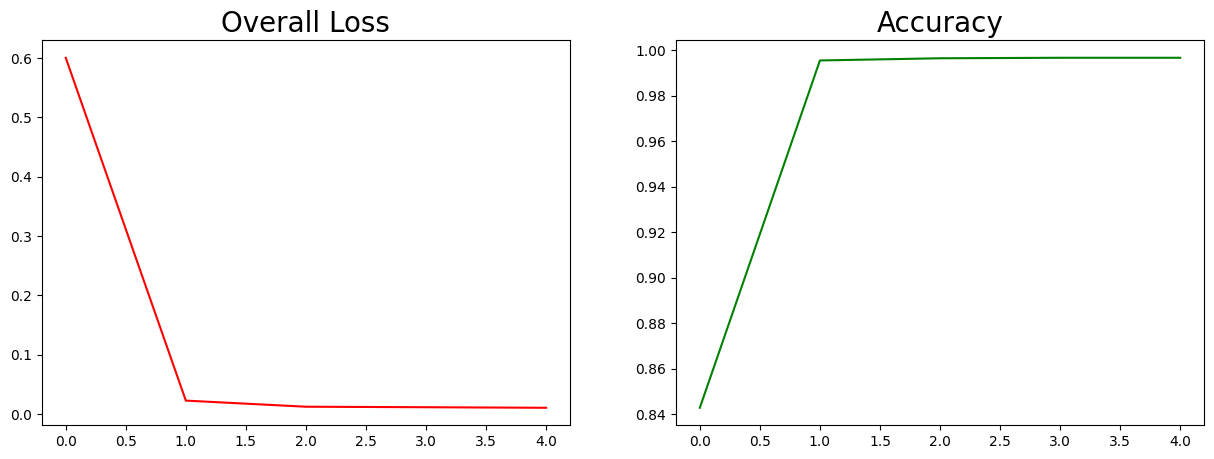

In [52]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Overall Loss',fontsize=20)
plt.plot(hist_['loss'],c='r',label='Overall Loss')
plt.subplot(1,2,2)
plt.title('Accuracy',fontsize=20)
plt.plot(hist_['accuracy'],c='g',label='Accuracy')

In [53]:
prediction=model.predict(X_test)

33/33 [==============================] - 1s 17ms/step


In [54]:
y_pred=[]
pred=[]
for row in prediction:
    N=np.argmax(row)
    y_pred.append(N)
    pred.append(get_code(N))
pd.DataFrame(pred,columns=['Predictions'])

,Predictions
0,Turkish
1,Tamil
2,Turkish
3,Russian
4,Russian
...,...
1029,Portugeese
1030,English
1031,Tamil
1032,English


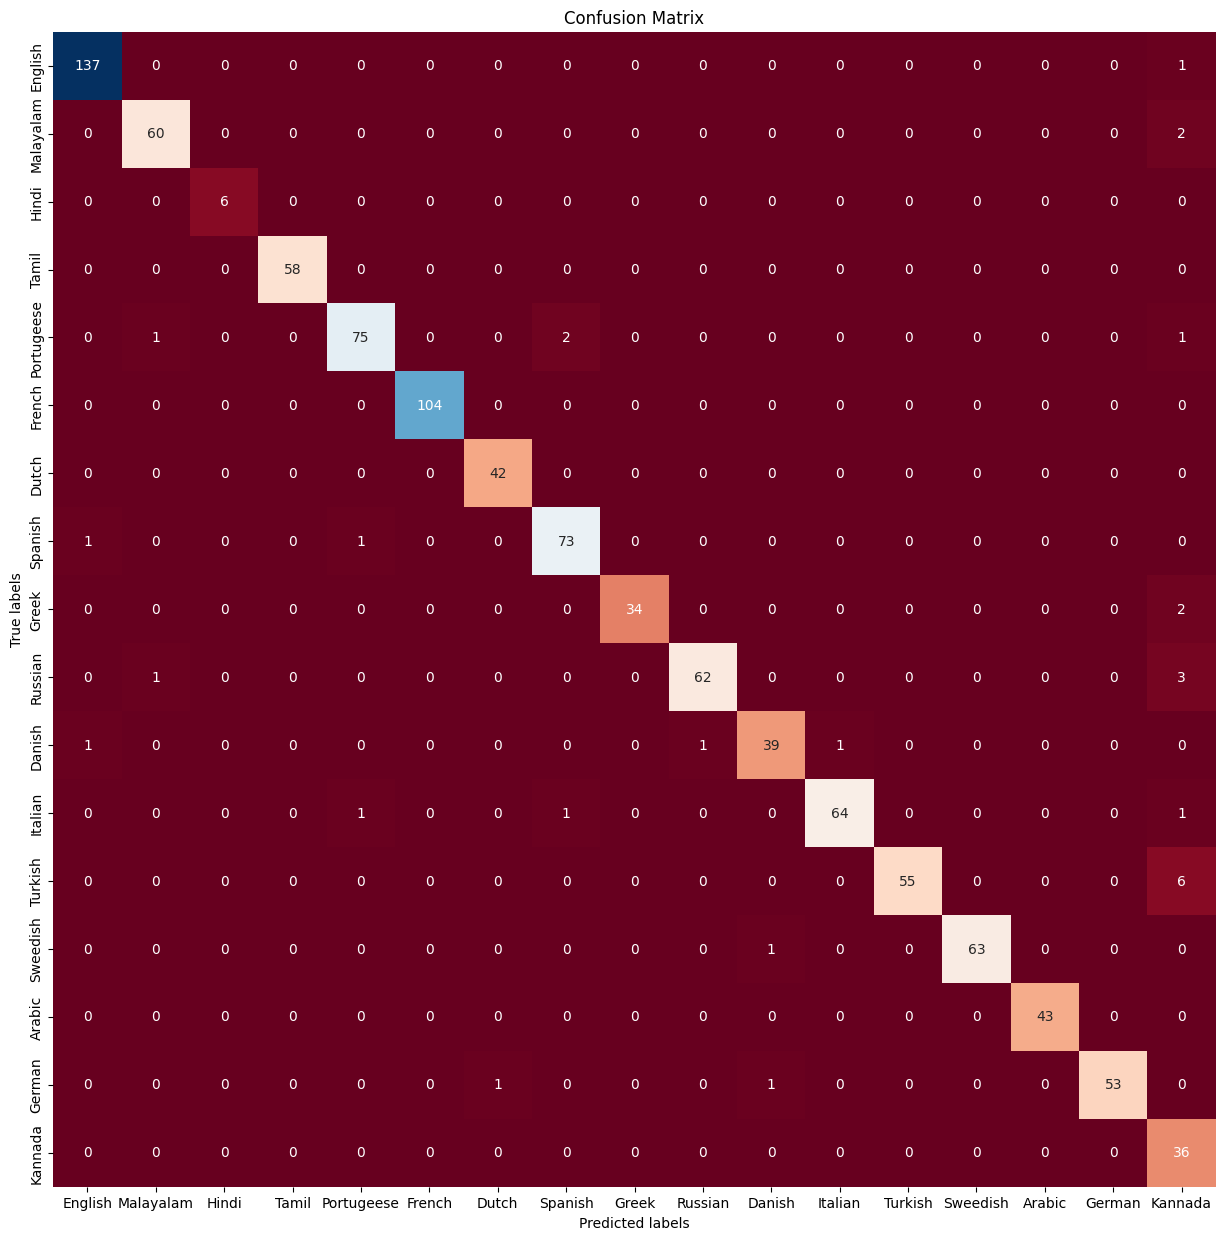

array([[137,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   1],
       [  0,  60,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   2],
       [  0,   0,   6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,  58,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   1,   0,   0,  75,   0,   0,   2,   0,   0,   0,   0,   0,
          0,   0,   0,   1],
       [  0,   0,   0,   0,   0, 104,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  42,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  1,   0,   0,   0,   1,   0,   0,  73,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  34,   0,   0,   0,   0,
          0,   0,   0,   2],
       [  0,   1,   0,   0,   0,   0,   0,   0,   0,  62,   0,   0,   0,
         

In [55]:
plt.figure(figsize=(15,15))
ax= plt.subplot()
CM = confusion_matrix(y_test, y_pred)
sns.heatmap(CM, annot=True, fmt='g', ax=ax,cbar=False,cmap='RdBu')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(dic.keys()) 
ax.yaxis.set_ticklabels(dic.keys())
plt.show()
CM

In [56]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       0.99      0.99      0.99       138
           1       0.97      0.97      0.97        62
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        58
           4       0.97      0.95      0.96        79
           5       1.00      1.00      1.00       104
           6       0.98      1.00      0.99        42
           7       0.96      0.97      0.97        75
           8       1.00      0.94      0.97        36
           9       0.98      0.94      0.96        66
          10       0.95      0.93      0.94        42
          11       0.98      0.96      0.97        67
          12       1.00      0.90      0.95        61
          13       1.00      0.98      0.99        64
          14       1.00      1.00      1.00        43
          15       1.00      0.96      0.98        55
          16       0.69      1.00      0.82        36

In [57]:
def prediction_func(sentence):
    sent=' '.join(remove_stop_word(sentence))
    sent=PipelineModel.transform([sent])
    sent=pd.DataFrame.sparse.from_spmatrix(sent)
    return get_code(np.argmax(model.predict(sent)))

In [58]:
#Arabic
prediction_func("مرحبا كيف حالك؟")

1/1 [==============================] - 0s 48ms/step


'Arabic'

In [59]:
#English
prediction_func('hello my name ahmed!')

1/1 [==============================] - 0s 31ms/step


'English'

In [60]:
#German
prediction_func('Mehrere Wörter, die einen Satz bilden, verwirren dich wohl.')

1/1 [==============================] - 0s 31ms/step


'German'

In [62]:
prediction_func('आपका स्वागत है')

1/1 [==============================] - 0s 31ms/step


'Hindi'

# APPLICATIONS OF LANGUAGE DETECTION

1.Multilingual Content Filtering

2.Search Engines and Information Retrieval

3.Machine Translation

4.Text Analysis and Natural Language Processing (NLP)

5.Customer Support and Chatbots

6.Social Media Monitoring

7.Spam Filtering

8.Data Localization and Regional Targeting